In [4]:
def f(u, t):
    return a*u*(1 - u/R)

a = 2
R = 1E+5
A = 1

import odespy
solver = odespy.RK4(f)
solver.set_initial_condition(A)

from numpy import linspace, exp
T = 10  # end of simulation
N = 30  # no of time steps
time_points = linspace(0, T, N+1)
u, t = solver.solve(time_points)



In [5]:
import matplotlib.pyplot as plt

In [3]:
plt.plot(u,t)

In [6]:
plt.show()

In [7]:
from math import sin,pi
from numpy import array,arange,sqrt,sin,cos,power,abs,real
import matplotlib.pyplot as plt
from scipy import integrate,constants

g=constants.g
l=0.1
om0=sqrt(g/l)
f=om0/(2.e0*pi)
T=1./f
print(T)

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = T*130
N = 50000
h = (b-a)/N
tpoints = arange(a,b,h)
print(b,T)

0.6344823283108564
82.48270268041134 0.6344823283108564


In [8]:
r_scipy=integrate.odeint(f,[3.0,0.0],tpoints)#
energy_scipy=(0.5e0)*power(real(r_scipy[:,1]),2)*l*l+g*l*(1.-cos(real(r_scipy[:,0])))


(0, 100)

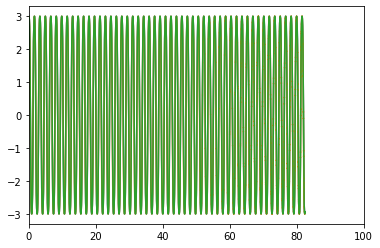

In [9]:
plt.plot(tpoints,r_scipy[:,0])
plt.xlim(0,10)
import odespy
solver = odespy.Leapfrog(f,rtol=1.e-8)
solver.set_initial_condition([3.0,0])

from numpy import linspace, exp

u, t = solver.solve(tpoints)
plt.plot(t,u[:,0])
plt.plot(t,r_scipy[:,0])
plt.xlim(0,100)

In [10]:

plt.show()


In [9]:
energy_odespy=(0.5e0)*power(real(u[:,1]),2)*l*l+g*l*(1.-cos(real(u[:,0])))
etot=g*l*(1.-cos(real(3.)))


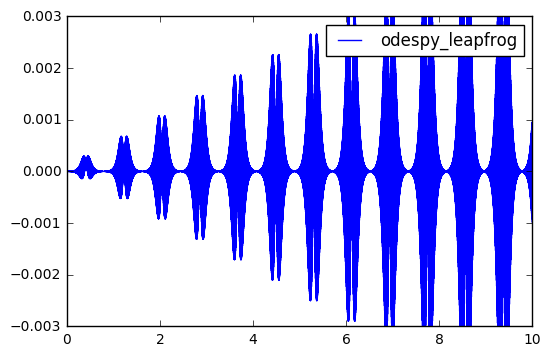

In [15]:
plt.clf()
plt.plot(tpoints,(energy_odespy-etot),label='odespy_leapfrog')
#plt.plot(tpoints,(energy_scipy-etot),label='scipy_default')
#plt.yscale('log')
plt.xlim(0,10)
plt.ylim(-0.003,0.003)
plt.legend(loc=1)
plt.show()